# Sprint
## Seq2Seq

## 1.このSprintについて

### Sprintの目的
- 系列データに関する応用例を学ぶ

### どのように学ぶか
公開されているコードを元に学んでいきます。

## 2.機械翻訳

系列データに関する手法の基本的な活用例としては機械翻訳があります。これは系列データを入力し、系列データを出力する**Sequence to Sequence**の手法によって行えます。

### 【問題1】
#### 機械翻訳の実行とコードリーディング
Keras公式のサンプルコードで、短い英語からフランス語への変換を行うものが公開されています。これを動かしてください。


[keras/lstm_seq2seq.py at master · keras-team/keras](https://github.com/keras-team/keras/blob/master/examples/lstm_seq2seq.py)


その上でこのサンプルコードの各部分がどういった役割かを読み取り、まとめてください。以下のようにどこからどこの行が何をしているかを記述してください。


（例）


- 51から55行目 : ライブラリのimport
- 57から62行目 : ハイパーパラメータの設定

**《文字単位のトークン化》**


この実装ではテキストのベクトル化の際に、単語ではなく文字ごとを1つのトークンとして扱っています。


scikit-learnでBoWを計算するCountVectorizerの場合では、デフォルトの引数は`analyzer='word'`で単語を扱いますが、`char`や`char_wb`とすることで文字を扱えるようになります。


`char`と`char_wb`の2種類の方法があり、`char_wb`を指定した場合、n_gramが単語内からのみ作成されます。逆に`char`は単語の区切りが関係なくn_gramが作成されます。`This movie is very good.`というテキストを3-gramでカウントする時、`char`では`s m`や`e i`といった単語をまたぐ数え方もしますが、`char_wb`ではこれらを見ません。


[sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.21.3 documentation](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [3]:
# english to french
%run lstm_seq2seq.py

Number of samples: 10000
Number of unique input tokens: 71
Number of unique output tokens: 92
Max sequence length for inputs: 16
Max sequence length for outputs: 59
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 47s 6ms/step - loss: 1.1785 - accuracy: 0.7228 - val_loss: 1.0874 - val_accuracy: 0.7034
Epoch 2/100
8000/8000 [==============================] - 43s 5ms/step - loss: 0.8548 - accuracy: 0.7687 - val_loss: 0.8349 - val_accuracy: 0.7674
Epoch 3/100
8000/8000 [==============================] - 50s 6ms/step - loss: 0.6931 - accuracy: 0.8062 - val_loss: 0.7208 - val_accuracy: 0.7934
Epoch 4/100
8000/8000 [==============================] - 48s 6ms/step - loss: 0.6016 - accuracy: 0.8254 - val_loss: 0.6565 - val_accuracy: 0.8068
Epoch 5/100
8000/8000 [====

**コードリーディング**

-> `lstm_seq2seq.py`にコメントとして記載。英文コメントをベースに各部分の動作を確認。

## 3.イメージキャプショニング

他の活用例としてイメージキャプショニングがあります。画像に対する説明の文章を推定するタスクです。これは画像を入力し、系列データを出力する**Image to Sequence**の手法によって行えます。


[pytorch-tutorial/tutorials/03-advanced/image_captioning at master · yunjey/pytorch-tutorial](https://github.com/yunjey/pytorch-tutorial/tree/master/tutorials/03-advanced/image_captioning)


イメージキャプショニングは学習に多くの時間がかかるため、ここでは学習済みの重みが公開されている実装を動かすことにします。Kerasには平易に扱える実装が公開されていないため、今回はPyTorchによる実装を扱います。

### 【問題2】
#### イメージキャプショニングの学習済みモデルの実行
上記実装において 5. Test the model の項目を実行してください。また、自身で用意した画像に対しても文章を生成してください。これらに対してどういった文章が出力されたかを記録して提出してください。


データセットからの学習は行わず、学習済みの重みをダウンロードして利用します。


注意点として、デフォルトで設定されている重みのファイル名と、ダウンロードできる重みのファイル名は異なっています。ここは書き換える必要があります。

1. require Microsoft Visual C++ build tools
2. https://visualstudio.microsoft.com/ja/downloads/
3. Build Tools for Visual Studio 2019 -> C++ Build Tools
4. coco/PythonAPI/setup.py
```
extra_compile_args=['-Wno-cpp', '-Wno-unused-function', '-std=c99']
```
to
```
extra_compile_args=['-std=c99']
```
[?????](https://www.google.com/search?q=%E6%95%B0%E5%80%A4%E5%9E%8B%E5%BC%95%E6%95%B0+%27%2FWno-cpp%27+%E3%81%AF%E7%84%A1%E5%8A%B9%E3%81%A7%E3%81%99%E3%80%82&rlz=1C1GCEU_jaJP903JP903&oq=%E6%95%B0%E5%80%A4%E5%9E%8B%E5%BC%95%E6%95%B0+%27%2FWno-cpp%27+%E3%81%AF%E7%84%A1%E5%8A%B9%E3%81%A7%E3%81%99%E3%80%82&aqs=chrome.0.69i59j0.377j0j7&sourceid=chrome&ie=UTF-8)

5. coco不要では？
6. 不要ではない
7. conda install cython
8. extra_compile_args=[]にする
9. python setup.py build_ext install
10. ./download.shしてからdata, modelを移動

In [6]:
import os

In [45]:
if os.getcwd().split('\\')[-1] != 'image_captioning':
    os.chdir('./image_captioning')

print(os.listdir('./png'))

['20190207194851.jpg', 'example.png', 'IMAG0124.jpg', 'image_captioning.png', 'model.png', 'no_image_square.jpg']


<start> a group of giraffes standing next to each other . <end>


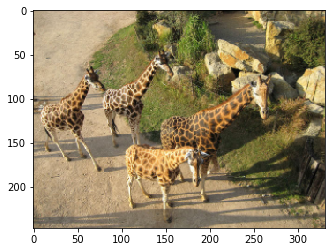

In [39]:
%run sample.py --image=./png/example.png

> 隣同士に立っているキリンの集団

正しい。

<start> a couple of dogs that are standing in the grass . <end>


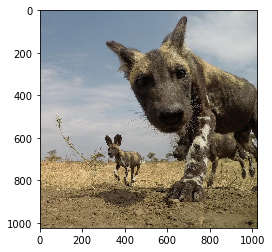

In [43]:
%run sample.py --image=./png/20190207194851.jpg

> 草原に立っている二匹の犬

yolo同様犬と検出された。本当に犬なのかは不明だが確かに犬には見える。

右側の犬（？）の奥にももう1匹存在するが、解像度が下がった影響で手前の犬（？）の体と認識されているのかもしれない。

<start> a plate of food with a fork and a fork . <end>


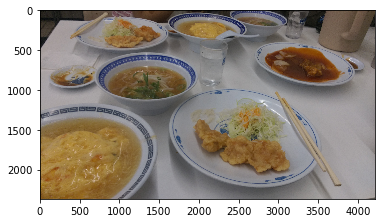

In [44]:
%run sample.py --image=./png/IMAG0124.jpg

> フォークとフォークと食べ物の乗った皿

箸はフォークと判定されがちな印象がある。

*a plate*という風に判定されているのが気になる。物体が多いと正しく判定しづらい？

<start> a black and white striped striped striped striped striped striped striped striped striped striped tie . <end>


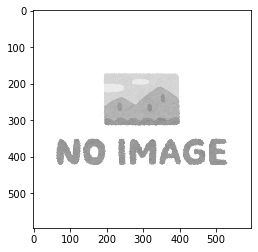

In [46]:
%run sample.py --image=./png/no_image_square.jpg

> 白黒のストライプのストライプのストライプの......ネクタイ

全くダメ。

キャプションの内容が違うのは想定内だったが、*striped striped striped......*という変な感じになってしまったのは想定外。興味深い。

### 【問題3】
#### Kerasで動かしたい場合はどうするかを調査
PyTorchによる実装を動かしましたが、何らかの理由からKerasで動かしたい状況が考えられます。どういった手順を踏むことになるか調査し、できるだけ詳しく説明してください。


特に今回はPyTorchのための学習済みの重みをKerasで使えるようにしたいので、その点については必ず触れてください。

- モデルの変換
  - `onnx`, `onnx2keras`を利用 (torch形式->ONNX->keras形式)
    
    \[サンプルコード\]
    ```python
    # ONNX形式でExport
    torch_model.load_state_dict(torch.load('sample_weight.pkl'))
    torch.onnx._export(torch_model,
                      input,
                      'sample_weight.onnx',
                      export_params=True)
    # Import
    onnx_model = onnx.load('sample_weight.onnx')
    keras_model = onnx2keras.onnx_to_keras(onnx_model, ['input'])
    ```
  - `MMdnn`の利用(こちらのほうが楽そう)

    複数のモデル間での重みの変換が可能。
  - `pytorch2keras`の利用
  
    pytorchモデル - kerasモデルの変換に特化したモジュール。

### 【問題4】
#### （アドバンス課題）コードリーディングと書き換え
モデル部分はmodel.pyに書かれていますが、Kerasではこのモデルがどのように記述できるかを考え、コーディングしてください。その際機械翻訳のサンプルコードが参考になります。

### 【問題5】
#### （アドバンス課題）発展的調査
**《他の言語の翻訳を行う場合は？》**


問題1の実装を使い日本語と英語の翻訳を行いたい場合はどのような手順を踏むか考えてみましょう。


**《機械翻訳の発展的手法にはどのようなものがある？》**


機械翻訳のための発展的手法にはどういったものがあるか調査してみましょう。


**《文章から画像生成するには？》**


イメージキャプショニングとは逆に文章から画像を生成する手法もあります。どういったものがあるか調査してみましょう。